#Importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Loading data from python inbuilt dataaset
boston_dataset = datasets.load_boston()
boston_df = pd.DataFrame(boston_dataset.data)
boston_df.columns = boston_dataset.feature_names
boston_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Load the dataset into Pandas Dataframe


boston_npy_target_column = np.asarray(boston_dataset.target)
boston_df['House_Price'] = pd.Series(boston_npy_target_column)

#Separating predictors and response
predictors = boston_df.iloc[:, :-1]
response = boston_df.iloc[:, -1]


In [ ]:
response.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors,response,test_size = 0.20)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


R squared Error on test set :  0.679963083368335
   Column_Name  Coefficient_Value
0         CRIM          -0.108535
1           ZN           0.048206
2        INDUS           0.021194
3         CHAS           2.879028
4          NOX         -19.720173
5           RM           4.166693
6          AGE           0.003902
7          DIS          -1.513460
8          RAD           0.362251
9          TAX          -0.013144
10     PTRATIO          -0.935274
11           B           0.008880
12       LSTAT          -0.520290


<BarContainer object of 13 artists>

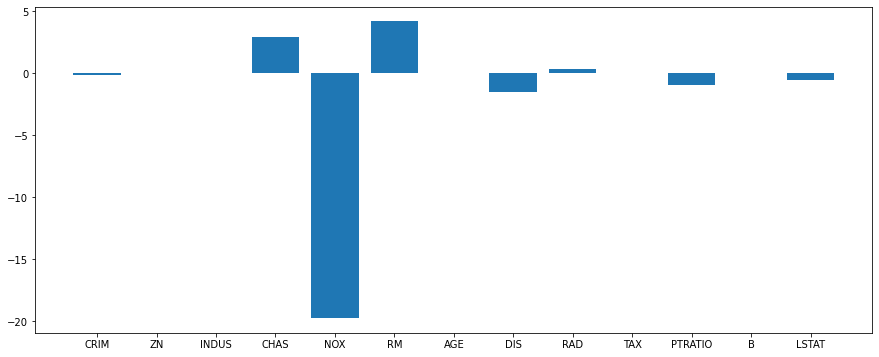

In [ ]:
# Apply a normal linear regression
linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)

# predicting on test
linearreg_prediction = linearreg.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(linearreg_prediction,Y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(linearreg.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])


R squared Error on test set :  0.680477665303616
   Column_Name  Coefficient_Value
0         CRIM          -0.105943
1           ZN           0.049090
2        INDUS          -0.005366
3         CHAS           2.786565
4          NOX         -13.810635
5           RM           4.214327
6          AGE          -0.001627
7          DIS          -1.434767
8          RAD           0.348917
9          TAX          -0.013659
10     PTRATIO          -0.871409
11           B           0.009074
12       LSTAT          -0.525767


<BarContainer object of 13 artists>

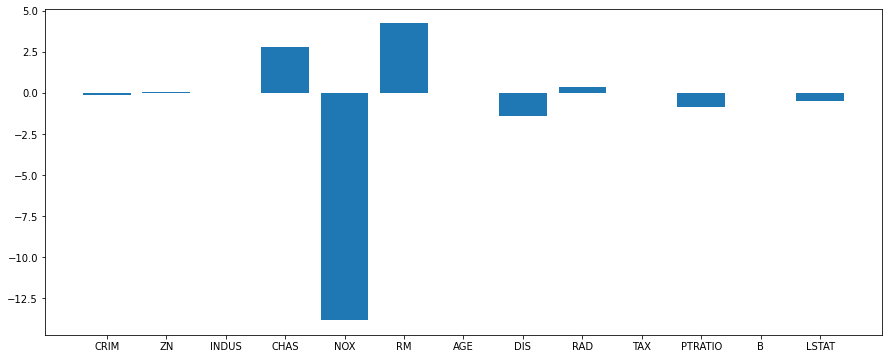

In [ ]:
# import ridge regression library
from sklearn.linear_model import Ridge

# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha 1
ridgeRegressor.fit(X_train, Y_train)
y_predicted_ridge = ridgeRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_ridge,Y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

R squared Error on test set :  0.6354793074639793
   Column_Name  Coefficient_Value
0         CRIM          -0.071281
1           ZN           0.047080
2        INDUS          -0.000000
3         CHAS           0.000000
4          NOX          -0.000000
5           RM           1.423281
6          AGE           0.020472
7          DIS          -0.693245
8          RAD           0.338556
9          TAX          -0.017004
10     PTRATIO          -0.696175
11           B           0.007919
12       LSTAT          -0.762792


<BarContainer object of 13 artists>

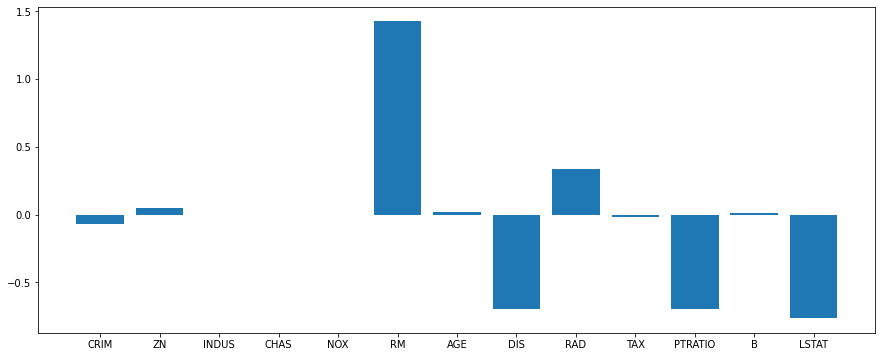

In [ ]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lassoRegressor = Lasso(alpha = 1) #here setting alpha 
lassoRegressor.fit(X_train, Y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,Y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])

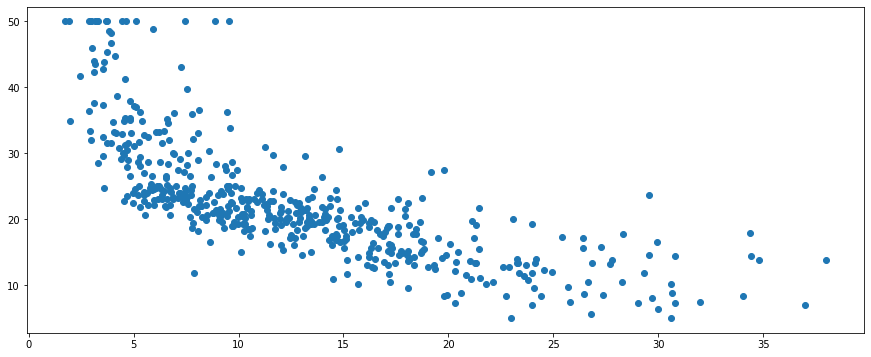

In [ ]:
import seaborn as sns
#sns.pairplot(boston_df)
plt.scatter(boston_df['LSTAT'],boston_df['House_Price'])